# World Population Analysis
## by (Bilal Ahmed)

## Introduction:

In [1]:
#Importing all useful directories for this project:

import pandas as pd
import numpy as np
import zipfile
import pycountry
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [3]:
#Loading Dataset
df_population = pd.read_csv('world_population_visualisation.csv')
df_population.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
df_population_old = df_population

In [5]:
#to round all float numbers in our dataset to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
df_population = df_population.rename({'Country/Territory':'Country','CCA3':'Country_Code','Area (km²)': 'Area','Density (per km²)':'Density','Growth Rate':'Growth_Rate','World Population Percentage':'Population_Percentage'}, axis =1)

In [7]:
df_population = df_population.drop(['Rank','Capital'], axis = 1)

In [8]:
df_population = pd.melt(frame = df_population, id_vars = ['Country_Code','Country','Continent','Area','Density','Growth_Rate','Population_Percentage'], var_name = 'Year', value_name= 'Population')

In [9]:
df_population['Year'] = df_population['Year'].str[:4]

In [10]:
df_population = df_population.reindex(columns=['Country_Code', 'Country', 'Continent','Year', 'Population', 'Area', 'Density', 'Growth_Rate', 'Population_Percentage'])


In [11]:
df_population.head()

,Country_Code,Country,Continent,Year,Population,Area,Density,Growth_Rate,Population_Percentage
0,AFG,Afghanistan,Asia,2022,41128771,652230,63.06,1.03,0.52
1,ALB,Albania,Europe,2022,2842321,28748,98.87,1.00,0.04
2,DZA,Algeria,Africa,2022,44903225,2381741,18.85,1.02,0.56
3,ASM,American Samoa,Oceania,2022,44273,199,222.48,0.98,0.00
4,AND,Andorra,Europe,2022,79824,468,170.56,1.01,0.00


In [12]:
#To find out how many unique values in continent column
df_population['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [13]:
#Finding null values in each category and found none
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country_Code           1872 non-null   object 
 1   Country                1872 non-null   object 
 2   Continent              1872 non-null   object 
 3   Year                   1872 non-null   object 
 4   Population             1872 non-null   int64  
 5   Area                   1872 non-null   int64  
 6   Density                1872 non-null   float64
 7   Growth_Rate            1872 non-null   float64
 8   Population_Percentage  1872 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 131.8+ KB


In [14]:
#finding dublicate values in dataset
df_population_duplicate = df_population[df_population.duplicated()]
df_population_duplicate

#No dublicate value found

,Country_Code,Country,Continent,Year,Population,Area,Density,Growth_Rate,Population_Percentage


## What is continent-wise population ratio in 1970?

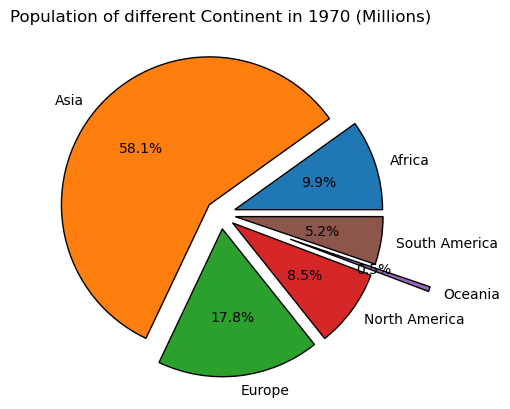

In [15]:
population_1970 = df_population.query('Year == "1970"').groupby('Continent')['Population'].sum()
pop_1970_percentage = population_1970.div(population_1970.sum()).mul(100)

plt.pie(pop_1970_percentage, labels = pop_1970_percentage.index, autopct='%1.1f%%', explode = (0.1, 0.1, 0.1, 0.1, 0.5, 0.1) ,wedgeprops = {"edgecolor": "black"})
plt.title("Population of different Continent in 1970 (Millions)")
plt.show()

## What is continent-wise population ratio in 2022?

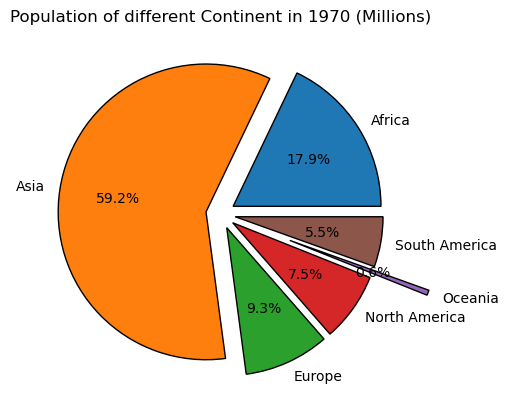

In [16]:
population_2022 = df_population.query('Year == "2022"').groupby('Continent')['Population'].sum()
pop_2022_percentage = population_2022.div(population_2022.sum()).mul(100)

plt.pie(pop_2022_percentage, labels = pop_2022_percentage.index, autopct='%1.1f%%', explode = (0.1, 0.1, 0.1, 0.1, 0.5, 0.1) ,wedgeprops = {"edgecolor": "black"})
plt.title("Population of different Continent in 1970 (Millions)")
plt.show()

## Top five most populated countries?

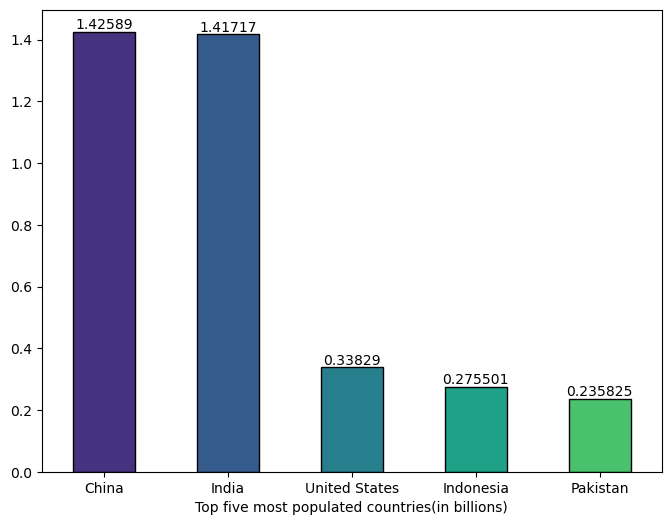

In [19]:
countries_population = df_population.query('Year == "2022"').groupby('Country')['Population'].sum()
df_most_poluted = countries_population.sort_values(ascending=False).head(5)
df_most_poluted = df_most_poluted.div(10**9)

colors = sns.color_palette("viridis")
ax = df_most_poluted.plot(kind = 'bar', color = colors, edgecolor = 'black', rot = 0, figsize = [8,6])
ax.bar_label(ax.containers[0], fontsize = 10)

plt.xlabel('Top five most populated countries(in billions)')
plt.show()

## How much percentage of population lives in top 5 most poluted Countries

In [20]:
df_population_old['World Population Percentage'].sort_values(ascending= False).head(5).sum()

46.300000000000004

## Top five least populated countries?

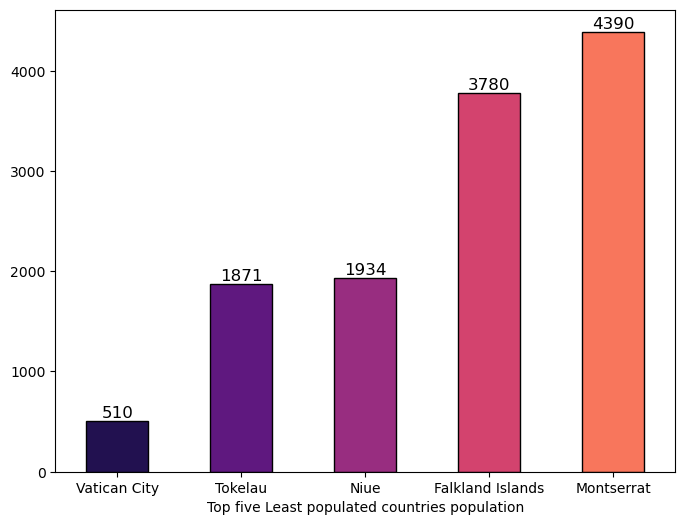

In [21]:
countries_population_l = df_population.query('Year == "2022"').groupby('Country')['Population'].sum()
df_least_poluted = countries_population_l.sort_values(ascending=True).head(5)

colors = sns.color_palette('magma')
ax = df_least_poluted.plot(kind = 'bar', color=colors, edgecolor = 'black', rot = 0, figsize = [8,6])
ax.bar_label(ax.containers[0], fontsize = 12)

plt.xlabel('Top five Least populated countries population')
plt.show()

## How many country in each continent?

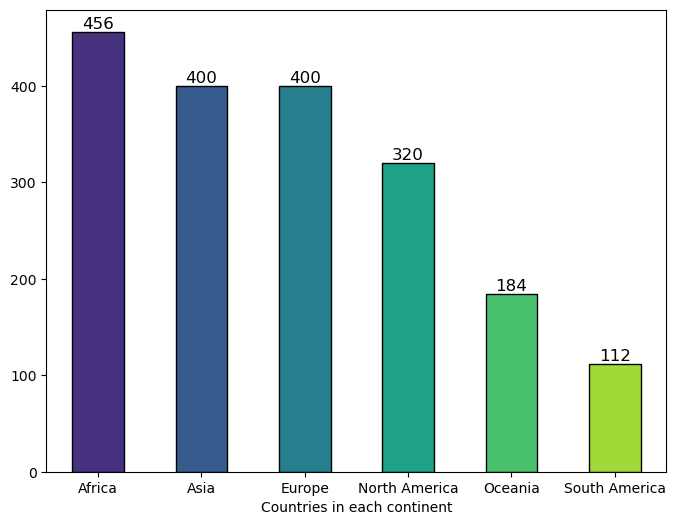

In [22]:
df_countries = df_population['Continent'].value_counts()

colors = sns.color_palette("viridis")
ax = df_countries.plot(kind = 'bar', color=colors,edgecolor = 'black', rot = 0, figsize = [8,6])
ax.bar_label(ax.containers[0], fontsize = 12)

plt.xlabel('Countries in each continent')
plt.show()